<h2>Project2</h2>

911 Calls for Servive in Baltimore, MD in 2020

Data source: https://data.baltimorecity.gov/datasets/911-calls-for-service-2020/data

Project 2 is an analysis of a data set to answer one or more questions about the data

In [1]:
import pandas as pd
import numpy as np
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First I want to load in the dataset and explore it a bit.

In [2]:
#data_old = pd.read_csv("911_Calls_for_Service_2020.csv")

#Takes a while to load in data
data = pd.read_csv("https://opendata.arcgis.com/datasets/798b84abd9aa4116896434a3ac85457c_0.csv",engine='python')

In [3]:
df = pd.DataFrame(data)

In [4]:
print(len(df)) #print number of rows
print(len((df).columns)) #print number of columns

1465130
19


In [5]:
#drop first column, duplicate index
df = df.drop(['ï»¿OBJECTID'], axis=1)

In [6]:
df.head()

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode
0,8285810,10CC9DA95F732422,2020/09/29 08:10:00,Low,ND,HIT AND RUN,P202730971,1200 W NORTHERN PY,1200 W NORTHERN PY BALTIMORE MD,Sabina-Mattfeldt,Northern,533.0,5.0,D2,Mount Washington/Coldspring,Census Tract 2715.01,NaN,21209.0
1,8286114,10CC9DA95F7333B2,2020/09/29 09:16:00,Low,SD,LARCENY,P202731136,900 WASHINGTON BL,900 WASHINGTON BL BALTIMORE MD,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2101,NaN,21230.0
2,8286082,10CC9DA95F733855,2020/09/29 09:36:00,Low,NE,AUTO THEFT,P202731188,4200 BLK FENWICK AV,4200 BLK FENWICK AV BALTIMORE MD,Hillen,Northeastern,412.0,3.0,D4,Northwood,Census Tract 2709.03,NaN,21218.0
3,8290068,10CC9DA95F748561,2020/09/30 09:17:00,Low,SE,OTHER,P202741169,1100 S CONKLING ST,1100 S CONKLING ST BALTIMORE MD,Canton,Southeastern,232.0,1.0,D6,Highlandtown,Census Tract 2609,NaN,21224.0
4,8290067,10CC9DA95F748784,2020/09/30 09:26:00,Low,WD,OTHER,P202741196,2400 WINCHESTER ST,2400 WINCHESTER ST BALTIMORE MD,Bridgeview/Greenlawn,Western,723.0,9.0,D9,Greater Rosemont,Census Tract 1605,NaN,21216.0


In [7]:
#Count number of missing values
df.isnull().sum()

recordId                             0
callKey                              0
callDateTime                         0
priority                             2
district                             0
description                          0
callNumber                           0
incidentLocation                     1
location                             0
Neighborhood                     22878
PoliceDistrict                   22803
PolicePost                       22803
CouncilDistrict                  22762
SheriffDistricts                 22801
Community_Statistical_Areas      23308
Census_Tracts                    22813
VRIZones                       1233043
ZIPCode                          23834
dtype: int64

In [8]:
#Explore dataset
print(df.columns) #get column names

print(df.priority.unique()) #each unique value in priority column

print(df.dtypes) #datatypes of each column

Index(['recordId', 'callKey', 'callDateTime', 'priority', 'district',
       'description', 'callNumber', 'incidentLocation', 'location',
       'Neighborhood', 'PoliceDistrict', 'PolicePost', 'CouncilDistrict',
       'SheriffDistricts', 'Community_Statistical_Areas', 'Census_Tracts',
       'VRIZones', 'ZIPCode'],
      dtype='object')
['Low' 'Non-Emergency' 'Medium' 'High' 'Emergency' 'Out of Service' nan]
recordId                         int64
callKey                         object
callDateTime                    object
priority                        object
district                        object
description                     object
callNumber                      object
incidentLocation                object
location                        object
Neighborhood                    object
PoliceDistrict                  object
PolicePost                     float64
CouncilDistrict                float64
SheriffDistricts                object
Community_Statistical_Areas     object
Ce

<h3>Hypotheses</h3>

A hypothesis that I would like to look at is "less car jackings occur during winter"

In [9]:
#Create new df of car jacking 911 calls
df_car = df[df.description == 'CAR JACKING']

In [10]:
df_car = df_car.reset_index()

#drop first column, duplicate index
df_car = df_car.drop(['index'], axis=1)

In [11]:
print(len(df_car)) #print number of rows
print(len((df_car).columns)) #print number of columns

731
18


In [12]:
df_car.head()

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode
0,8440888,1201020A5FA1FC78,2020/11/03 19:57:00,High,CW,CAR JACKING,P203083941,2300 E NORTHERN PY,2300 E NORTHERN PY BALTIMORE MD,Hamilton Hills,Northeastern,423.0,3.0,D3,Harford/Echodale,Census Tract 2707.02,NaN,21214.0
1,8460110,1201020A5FA7D5E3,2020/11/08 06:26:00,High,ND,CAR JACKING,P203131289,3400 ROYCE AV,3400 ROYCE AV BALTIMORE MD,Central Park Heights,Northwestern,614.0,6.0,D1,Southern Park Heights,Census Tract 2716,NaN,21215.0
2,8464931,1201020A5FA9809C,2020/11/09 12:46:59,High,NW,CAR JACKING,P203142226,NORTHWESTERN DISTRICT,NORTHWESTERN DISTRICT BALTIMORE MD,Woodmere,Northwestern,623.0,5.0,D1,Pimlico/Arlington/Hilltop,Census Tract 2718.01,Northwestern,21215.0
3,8468795,1201020A5FAAAFDC,2020/11/10 10:21:00,High,SW,CAR JACKING,P203151764,SOUTHWEST DISTRICT,SOUTHWEST DISTRICT BALTIMORE MD,Gwynns Falls,Southwestern,832.0,10.0,D10,Allendale/Irvington/S. Hilton,Census Tract 2006,NaN,21223.0
4,8469103,1201020A5FAAC0B9,2020/11/10 11:32:00,High,ND,CAR JACKING,P203152052,NORTHERN DISTRICT,NORTHERN DISTRICT BALTIMORE MD,Coldspring,Northern,533.0,6.0,D2,Mount Washington/Coldspring,Census Tract 1308.05,NaN,21209.0


In [13]:
#Make new dataframe that counts the number of carjackings by month

#First want to make new date column that simplifies the callDateTime to just the month

In [14]:
#Create list of months (there were no missing dates in df)
m_list = []
for t in df_car['callDateTime']:
    #2020/11/10 11:32:00
    time = datetime.datetime.strptime(t, '%Y/%m/%d %H:%M:%S')
    m_list.append(time.month)

In [15]:
#Add month list to df_car
df_car['Month'] = m_list

In [16]:
df_car.head()

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,ZIPCode,Month
0,8440888,1201020A5FA1FC78,2020/11/03 19:57:00,High,CW,CAR JACKING,P203083941,2300 E NORTHERN PY,2300 E NORTHERN PY BALTIMORE MD,Hamilton Hills,Northeastern,423.0,3.0,D3,Harford/Echodale,Census Tract 2707.02,NaN,21214.0,11
1,8460110,1201020A5FA7D5E3,2020/11/08 06:26:00,High,ND,CAR JACKING,P203131289,3400 ROYCE AV,3400 ROYCE AV BALTIMORE MD,Central Park Heights,Northwestern,614.0,6.0,D1,Southern Park Heights,Census Tract 2716,NaN,21215.0,11
2,8464931,1201020A5FA9809C,2020/11/09 12:46:59,High,NW,CAR JACKING,P203142226,NORTHWESTERN DISTRICT,NORTHWESTERN DISTRICT BALTIMORE MD,Woodmere,Northwestern,623.0,5.0,D1,Pimlico/Arlington/Hilltop,Census Tract 2718.01,Northwestern,21215.0,11
3,8468795,1201020A5FAAAFDC,2020/11/10 10:21:00,High,SW,CAR JACKING,P203151764,SOUTHWEST DISTRICT,SOUTHWEST DISTRICT BALTIMORE MD,Gwynns Falls,Southwestern,832.0,10.0,D10,Allendale/Irvington/S. Hilton,Census Tract 2006,NaN,21223.0,11
4,8469103,1201020A5FAAC0B9,2020/11/10 11:32:00,High,ND,CAR JACKING,P203152052,NORTHERN DISTRICT,NORTHERN DISTRICT BALTIMORE MD,Coldspring,Northern,533.0,6.0,D2,Mount Washington/Coldspring,Census Tract 1308.05,NaN,21209.0,11


In [17]:
#Create new df that counts the number of times each month occurs in the dataset
numCalls = df_car["Month"].value_counts()
numCalls = numCalls.reset_index()
numCalls.columns = ["Month","num_of_calls"] 

numCalls.head()

,Month,num_of_calls
0,1,97
1,9,77
2,11,76
3,10,68
4,8,66


In [18]:
#Order months ascending
numCalls = numCalls.sort_values(by=['Month'])
numCalls = numCalls.reset_index()

In [19]:
numCalls = numCalls.drop(['index'], axis=1)

In [20]:
numCalls

,Month,num_of_calls
0,1,97
1,2,43
2,3,64
3,4,27
4,5,43
5,6,61
6,7,60
7,8,66
8,9,77
9,10,68


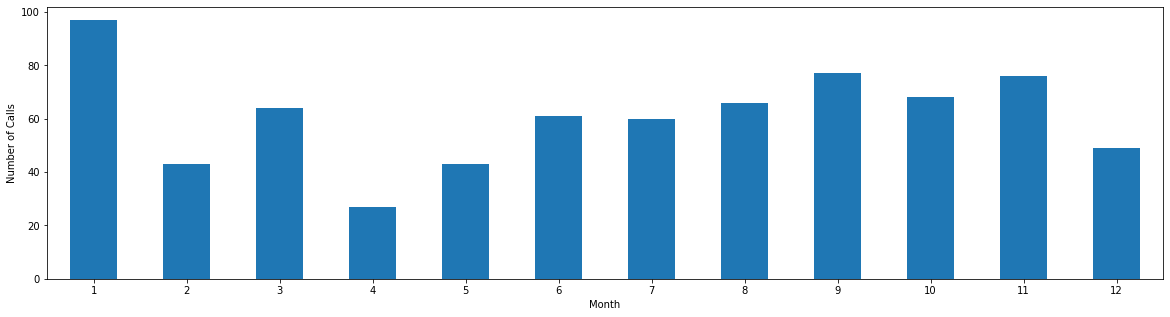

In [21]:
#Now make a barplot that visualizes how many calls occur each month
numCalls.plot.bar(x='Month', y='num_of_calls', rot=0, figsize = (20,5), legend=None)

plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

---
When we revisit the hypothesis "less car jackings occur during winter" and look at the above graph, we notice that the hypothesis is false. 

Winter is from late December to late March or on the graph 12-3. The month with the most car jackings is actually January.

When we look at the other months we can see that February, April, May, and December are the months with less car jackings than other months. 

This data also just shows the 911 calls that reported car jackings. We do not know how many were unreported. 

We also cannot infer from this data why January has a significantly higher amount of calls than then other months. Maybe this has to do with it being right after the holidays?

---

---
Another hypothesis that I had was "more car jacking calls occur during the late afternoon and early evening". My reasoning here was that maybe cars are targeted while people are at work and thus the owner will only notice after work and call then.

---

In [22]:
#To investigete, we must complete similar steps to above

#Create list of hours 
m_list = []
for t in df_car['callDateTime']:
    #2020/11/10 11:32:00
    time = datetime.datetime.strptime(t, '%Y/%m/%d %H:%M:%S')
    m_list.append(time.hour)

In [23]:
df_car['Hour'] = m_list

In [24]:
#Create new df that counts the number of times each hour occurs in the dataset
numCallsH = df_car["Hour"].value_counts()
numCallsH = numCallsH.reset_index()
numCallsH.columns = ["Hour","num_of_calls"] 

numCallsH.head()

,Hour,num_of_calls
0,21,60
1,19,56
2,23,50
3,0,46
4,20,44


In [25]:
#Order hours ascending
numCallsH = numCallsH.sort_values(by=['Hour'])
numCallsH = numCallsH.reset_index()

In [26]:
numCallsH = numCallsH.drop(['index'], axis=1)

In [27]:
numCallsH

,Hour,num_of_calls
0,0,46
1,1,28
2,2,25
3,3,21
4,4,21
5,5,12
6,6,9
7,7,13
8,8,17
9,9,22


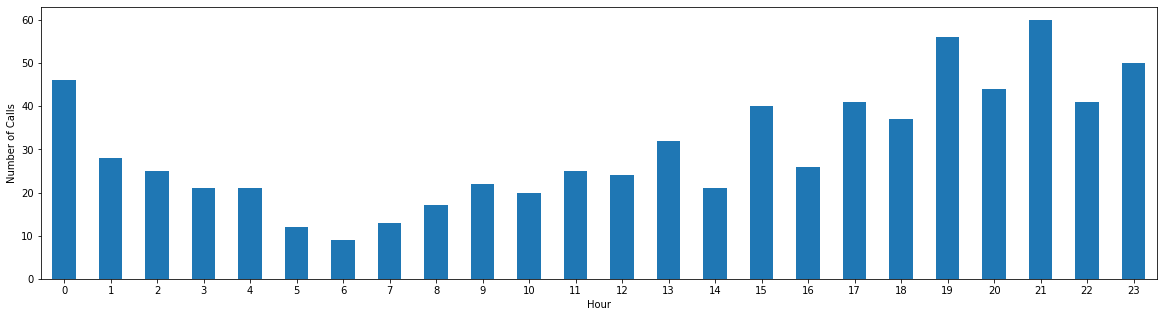

In [28]:
#Now make a barplot that visualizes how many calls occur each hour
numCallsH.plot.bar(x='Hour', y='num_of_calls', rot=0, figsize = (20,5), legend=None)

plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

---
When we revisit the hypothesis "more car jacking calls occur during the late afternoon and early evening" and look at the above graph, we notice that the hypothesis is true but also somewhat false.

The graph shows that car jacking calls occur frequently from 3 pm to 12 am, but are more common from around 7 pm to 12 am. In fact the times with the highest number of calls are 7 pm and 9 pm.

The graph seems to show that car jackings occur most often when people are typically at home and getting ready to sleep.

---

---
One more hypothesis I have is "more 911 calls occur during night, specifically from around 7 pm to 3 am"

Like the work above we will need to extract the month from the date column and create a new column that consists of just the months, but this time we are looking at all of the calls and not just those related to car jackings.

---

In [29]:
df2 = df

In [30]:
#Create list of hours 
h_list = []
for t in df2['callDateTime']:
    #2020/11/10 11:32:00
    time = datetime.datetime.strptime(t, '%Y/%m/%d %H:%M:%S')
    h_list.append(time.hour)

In [31]:
df2['Hour'] = h_list

In [32]:
#Create new df that counts the number of times each hour occurs in the dataset
numCallsH = df2["Hour"].value_counts()
numCallsH = numCallsH.reset_index()
numCallsH.columns = ["Hour","num_of_calls"] 

numCallsH.head()

,Hour,num_of_calls
0,0,86969
1,16,84383
2,17,82658
3,18,80676
4,23,77161


In [33]:
#Order hours ascending
numCallsH = numCallsH.sort_values(by=['Hour'])
numCallsH = numCallsH.reset_index()

In [34]:
numCallsH = numCallsH.drop(['index'], axis=1)

In [35]:
numCallsH

,Hour,num_of_calls
0,0,86969
1,1,67942
2,2,56300
3,3,45079
4,4,34111
5,5,27757
6,6,19691
7,7,36923
8,8,56465
9,9,63522


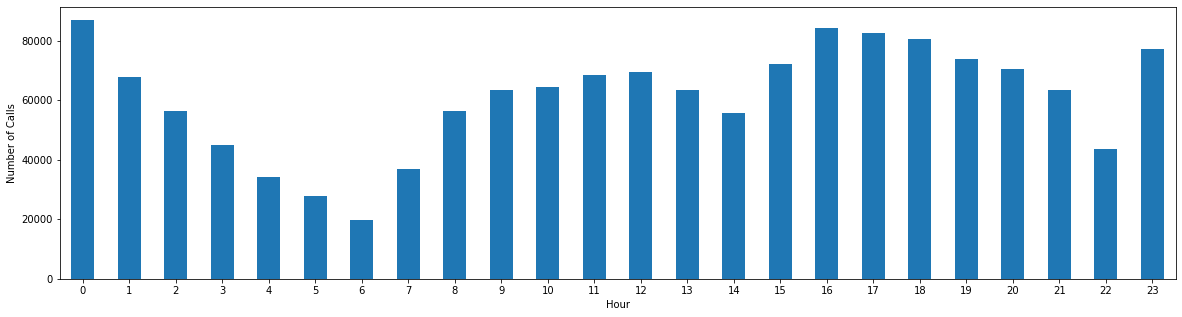

In [36]:
#Now make a barplot that visualizes how many calls occur each hour
numCallsH.plot.bar(x='Hour', y='num_of_calls', rot=0, figsize = (20,5), legend=None)

plt.xlabel('Hour')
plt.ylabel('Number of Calls')
plt.show()

---
By looking at the graph above we can see that there are many 911 calls all throughout the day. There is indeed a slight peak from 3 pm to 1 am, but more noticable is that there are extremely few calls from 2 am to 8 am. 

The hypothesis I had was "more 911 calls occur during night, specifically from around 7 pm to 3 am". I would say that my hypothesis is false, in fact very few compared to other hours occur at 3 am. Most calls seem to occur from the late afternoon to around midnight, but there are also still quite a few calls during the day.

---